In [16]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You can download the dataset here: https://www.kaggle.com/uciml/iris

In [17]:
#Reading the data
X=pd.read_csv('Iris.csv')
X_1=pd.read_csv('Iris.csv')
print(X.shape)
X.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


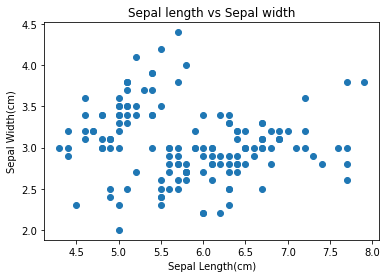

In [20]:
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'])
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.show()

We see that the dataset has 150 rows and 6 columns, including a categorical column. For the purpose of this demonstration, we do not need the Species and Id columns. So, we'd drop them.

In [21]:
print(f"Previously, our dataset had {X.shape[1]} columns. \n")
X.drop(['Species','Id'],axis=1,inplace=True)
print(f"Now our dataset has {X.shape[1]} columns since we dropped the \'Species\' and \'Id\' columns.")

Previously, our dataset had 6 columns. 

Now our dataset has 4 columns since we dropped the 'Species' and 'Id' columns.


In [22]:
X_scaled=(X - X.mean())/X.std()
X_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [23]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,-5.684342e-16,1.0,-1.863780,-0.897674,-0.052331,0.672249,2.483699
SepalWidthCm,150.0,-6.158037e-16,1.0,-2.430844,-0.585801,-0.124540,0.567351,3.104284
PetalLengthCm,150.0,1.894781e-16,1.0,-1.563497,-1.223442,0.335143,0.760212,1.780377
PetalWidthCm,150.0,-1.894781e-16,1.0,-1.439627,-1.177559,0.132781,0.787951,1.705189


In [24]:
covariance_mat=X_scaled.corr()
covariance_mat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [25]:
eigen_vectors, eigen_values, eigen_vectors_inv=np.linalg.svd(covariance_mat)
print(eigen_vectors.shape,eigen_values.shape,eigen_vectors_inv.shape)

(4, 4) (4,) (4, 4)


In [26]:
order = eigen_values.argsort()[::-1]  
 
eig_values = eigen_values[order]

eig_vectors = eigen_vectors[order]


In [27]:
row = ["Component " + str(i+1) for i in range(len(eigen_values))]
col = ["std deviation","variance(%)","cumulative variance(%)"]

total_variance = sum(eigen_values)                      
variance_table = pd.DataFrame([[i**0.5,
                      np.round(i*100 /total_variance,2), #the contribution of an eigen value to the variance
                      np.round(j*100/total_variance,2)] for i,j in zip(eigen_values,np.cumsum(eigen_values))],
                        columns= col,index = row)
variance_table

,std deviation,variance(%),cumulative variance(%)
Component 1,1.706112,72.77,72.77
Component 2,0.959803,23.03,95.80
Component 3,0.383866,3.68,99.48
Component 4,0.143554,0.52,100.00


We see that 2 components is sufficient to explain the data, as it contains 95% variance. Hence, we consider 2 components.

In [28]:
n_components = 2
eigenvector_subset = eig_vectors[:,0:n_components]


In [29]:
X_prime = np.dot(X_scaled,eigenvector_subset)
X_prime=pd.DataFrame(X_prime, columns=['X_prime_1','X_prime_2'])
print(X_prime.shape)
X_prime.head()                                 

(150, 2)


,X_prime_1,X_prime_2
0,2.256981,-0.504015
1,2.079459,0.653216
2,2.360044,0.317414
3,2.296504,0.573447
4,2.380802,-0.672514


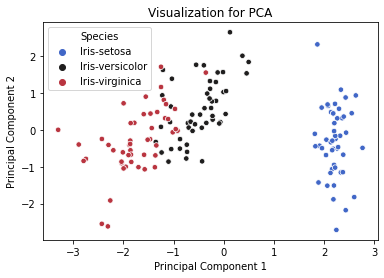

In [30]:
sns.scatterplot(data = X_prime , x = 'X_prime_1',y = 'X_prime_2' ,
                hue = X_1['Species'] , s = 30 , palette= 'icefire')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization for PCA')
plt.show()